In [1]:
# import
from models import *
from inference import *
import matplotlib.pyplot as plt

In [2]:
# create models

pi0 = np.array([0.333, 0.333, 0.334]) #inital distribution
Ps = np.array([[0.33, 0.33, 0.34], [0.33, 0.33, 0.34], [0.33, 0.33, 0.34]]) #transition matrix

#toy example
counts = np.array([0, 1, 2, 3, 4, 4,4,4,4,4]).astype(np.int32)
lambdas = np.array([1, 1, 2]).astype(np.int32)
ll = poisson_logpdf(counts, lambdas)

# run toy example to initialize funciuton
posterior, normalizer = hmm_expected_states(pi0, Ps, ll)


In [3]:
ll.shape

(10, 3)

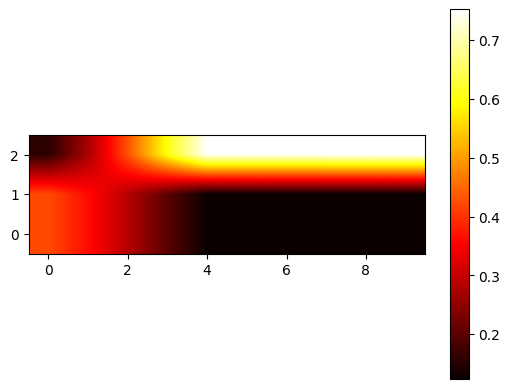

In [4]:
plt.imshow(posterior.T, cmap='hot', interpolation= 'bilinear', origin='lower')
plt.colorbar()

plt.show()

In [6]:
#common parameters
x0 = 0.5
Rh = 75
T = 100

# define parameters ramp
beta = 1.5
sigma = 0.5
K = 50

# define parameters step
m = 64
r = 20

In [7]:
# Replace numerical arguments with variable name
rhmm = HMM_Ramp_Model(beta, sigma, x0, Rh, K, T)
shmm = HMM_Step_Model(m, r, x0, Rh, T)

In [12]:
spikes_ramp, xs_ramp, rates_ramp = rhmm.simulate()
spikes_step, xs_step, rates_step = shmm.simulate()

In [13]:
ll_ramp = poisson_logpdf(spikes_ramp, rhmm.lambdas)
ll_step = poisson_logpdf(spikes_step, shmm.lambdas)

In [14]:

posterior_ramp, normalizer_ramp = hmm_expected_states(rhmm.pi0, rhmm.P, ll_ramp)
posterior_step, normalizer_step = hmm_expected_states(shmm.pi0, shmm.P, ll_step)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kiril\AppData\Local\Temp\ipykernel_16144\1680516061.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Time index ($ \Delta t = 10 ms$)')
C:\Users\kiril\AppData\Local\Temp\ipykernel_16144\1680516061.py:12: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Time index ($ \Delta t = 10 ms$)')


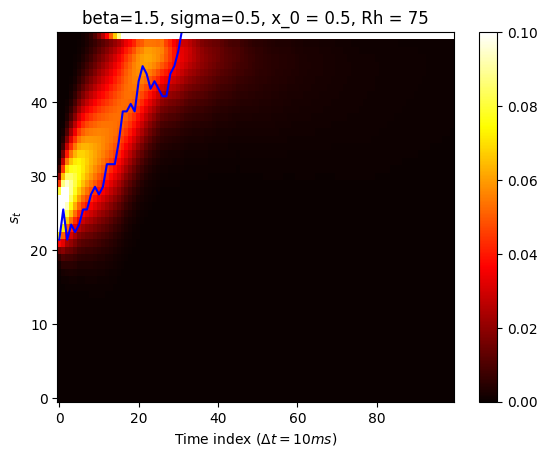

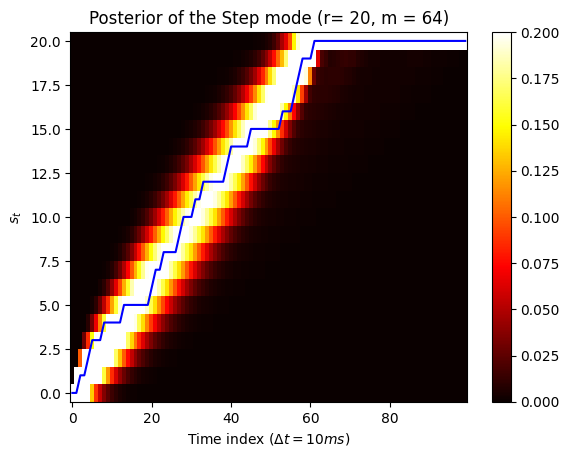

In [15]:
plt.plot(xs_ramp * rhmm.K, color = 'blue')
plt.imshow(posterior_ramp.T, cmap='hot', interpolation='none', origin='lower', vmin=0.0, vmax=0.1, aspect = 'auto')
plt.title('beta={beta}, sigma={sigma}, x_0 = {x_0}, Rh = {Rh}'.format(beta=rhmm.beta, sigma=rhmm.sigma, x_0=rhmm.x0, Rh=rhmm.Rh))
plt.xlabel('Time index ($ \Delta t = 10 ms$)')
plt.ylabel('$s_t$')
plt.colorbar()
plt.show()

plt.plot(xs_step, color = 'blue')
plt.imshow(posterior_step.T, cmap='hot', interpolation='none', origin='lower', vmin=0.0, vmax=0.2, aspect = 'auto')
plt.title('Posterior of the Step mode (r= {r}, m = {m})'.format(r=shmm.r, m=shmm.m))
plt.xlabel('Time index ($ \Delta t = 10 ms$)')
plt.ylabel('$s_t$')
plt.colorbar()
plt.show()

In [ ]:
# c = np.linspace(0,1,10)
# print(xs_step[30])

# d = 30
# for i in range(10):
#     plt.plot(posterior_step[d+i][0:-1], color = plt.cm.viridis(c[i]))
#     plt.scatter(xs_step[d+i], posterior_step[d+i][xs_step[d+i]], color = plt.cm.viridis(c[i]))

In [144]:
# create set of realizations for step model
shmm = HMM_Step_Model(m=32, r = 20, x0 = 0.2, Rh = 75, T = 100)
spikes_step, xs_step, rates_step = shmm.simulate(10000)

In [154]:

ll = poisson_logpdf(spikes_step, shmm.lambdas)
infered_transition = []
for i in range(len(ll)):
    posterior_step, _ = hmm_expected_states(shmm.pi0, shmm.P, ll[i])
    # if i < 20:
        # plt.plot(posterior_step[:,10], color = 'blue', alpha = 0.1, label = i)
        # plt.scatter(xs_step[10], posterior_step[10, xs_step[i]], color = 'red')
    for j in range(len(posterior_step)):
        if posterior_step[j, -1] > 0.5:
            infered_transition.append(j)
            break

ll_filter = poisson_logpdf(spikes_step, shmm.lambdas)
infered_transition_filter = []
for i in range(len(ll)):
    posterior_step_filter, _ = hmm_expected_states(shmm.pi0, shmm.P, ll[i], filter = True)
    # if i < 20:
        # plt.plot(posterior_step[:,10], color = 'blue', alpha = 0.1, label = i)
        # plt.scatter(xs_step[10], posterior_step[10, xs_step[i]], color = 'red')
    for j in range(len(posterior_step)):
        if posterior_step_filter[j, -1] > 0.5:
            infered_transition_filter.append(j)
            break

    # if posterior_step[-1,-1]:
    #     infered_transition.append(None)

# plt.legend()

In [146]:
true_transitions = []

for x in xs_step:
    for i in range(len(x)):
        if x[i] == shmm.r:
            true_transitions.append(i)
            break

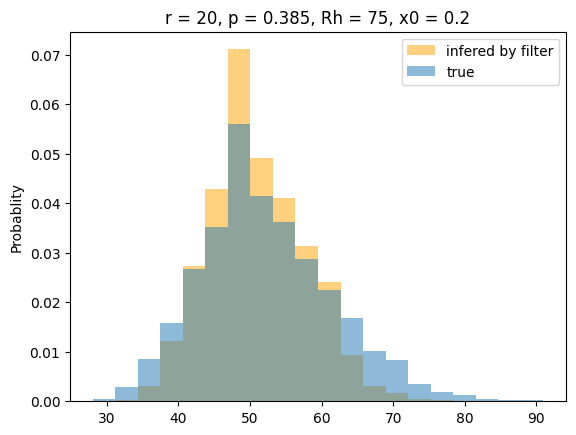

In [157]:
# _, bins, _ = plt.hist(infered_transition, bins = 20, alpha = 0.5, color='red', label='infered by smoothing', density=True)
# _ = plt.hist(true_transitions, bins = bins, alpha = 0.5, label='true', density=True)
# plt.title('r = {r}, p = {p}, Rh = {Rh}, x0 = {x0}'.format(r=shmm.r, p = np.round(shmm.p,3), Rh=shmm.Rh, x0=shmm.x0))
# # plt.xlabel('State')
# plt.ylabel('Probablity')
# plt.legend()
# # print(np.mean(np.array(infered_transition)), np.mean(np.array(true_transitions)))
# plt.plot()

plt.hist(infered_transition_filter, bins = bins, alpha = 0.5, color='orange', label='infered by filter', density=True)
_ = plt.hist(true_transitions, bins = bins, alpha = 0.5, label='true', density=True)
plt.title('r = {r}, p = {p}, Rh = {Rh}, x0 = {x0}'.format(r=shmm.r, p = np.round(shmm.p,3), Rh=shmm.Rh, x0=shmm.x0))
# plt.xlabel('State')
plt.ylabel('Probablity')
plt.legend()

38 -51


(array([2.80926969e-05, 8.42780907e-05, 8.42780907e-05, 3.93297757e-04,
        4.49483151e-04, 1.57319103e-03, 2.21932306e-03, 4.41055341e-03,
        7.16363771e-03, 9.04584841e-03, 1.64061350e-02, 1.67994328e-02,
        2.93568683e-02, 2.68285255e-02, 7.05126692e-02, 3.68857110e-02,
        2.56767250e-02, 1.46082024e-02, 7.47265738e-03, 6.37704220e-03,
        2.38787924e-03, 1.57319103e-03, 2.52834272e-04, 2.52834272e-04,
        5.61853938e-05]),
 array([-51.  , -47.44, -43.88, -40.32, -36.76, -33.2 , -29.64, -26.08,
        -22.52, -18.96, -15.4 , -11.84,  -8.28,  -4.72,  -1.16,   2.4 ,
          5.96,   9.52,  13.08,  16.64,  20.2 ,  23.76,  27.32,  30.88,
         34.44,  38.  ]),
 <BarContainer object of 25 artists>)

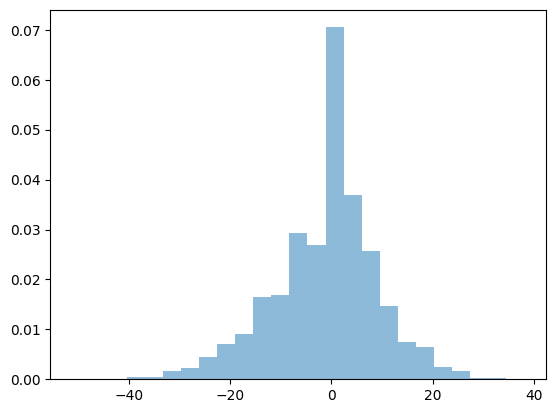

In [163]:
err = np.array(infered_transition_filter[0:9999]) -np.array(true_transitions)
print(np.max(err), np.min(err))
plt.hist(err, bins = 25, alpha = 0.5, label='error', density=True)

Text(0, 0.5, '$p(s_t = high  | n_{1:T})$')

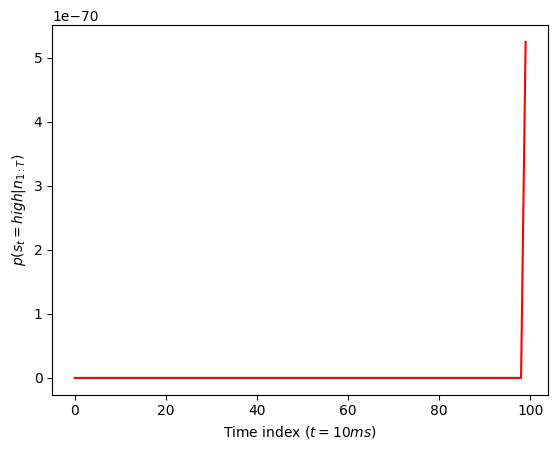

In [32]:
# plt.plot(posterior_ramp[:, -1], color = 'black', label = 'Ramp')
plt.plot(posterior_step[:, -1], color = 'red', label = 'Step')
plt.xlabel('Time index ($ t = 10 ms $)')
plt.ylabel('$p(s_t = high  | n_{1:T})$')
# plt.legend()


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kiril\AppData\Local\Temp\ipykernel_8636\201896233.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Time index ($ \Delta t = 10 ms$)')
C:\Users\kiril\AppData\Local\Temp\ipykernel_8636\201896233.py:19: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Time index ($ \Delta t = 10 ms$)')


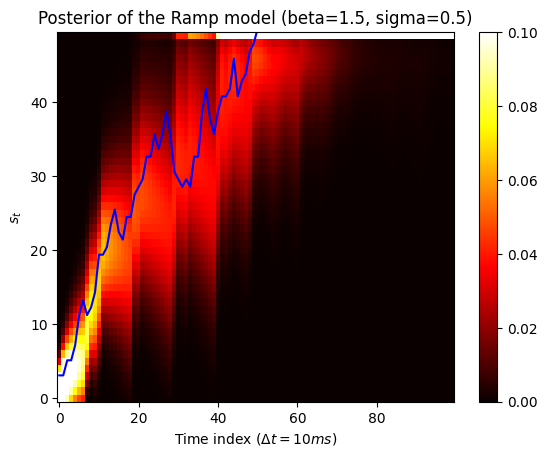

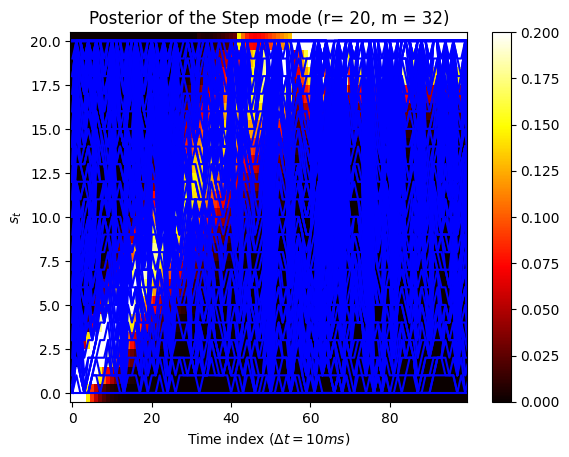

In [164]:
#compute the fiter estiamte of the state for the 2 models


posterior_ramp_filter, normalizer_ramp_filter = hmm_expected_states(rhmm.pi0, rhmm.P, ll_ramp, filter=True)
posterior_step_filter, normalizer_step_filter = hmm_expected_states(shmm.pi0, shmm.P, ll_step, filter = True)

plt.plot(xs_ramp * rhmm.K, color = 'blue')
plt.imshow(posterior_ramp_filter.T, cmap='hot', interpolation='none', origin='lower', vmin=0.0, vmax=0.1, aspect = 'auto')
plt.title('Posterior of the Ramp model (beta={beta}, sigma={sigma})'.format(beta=rhmm.beta, sigma=rhmm.sigma))
plt.xlabel('Time index ($ \Delta t = 10 ms$)')
plt.ylabel('$s_t$')
plt.colorbar()
plt.show()


plt.plot(xs_step, color = 'blue')
plt.imshow(posterior_step_filter.T, cmap='hot', interpolation='none', origin='lower', vmin=0.0, vmax=0.2, aspect = 'auto')
plt.title('Posterior of the Step mode (r= {r}, m = {m})'.format(r=shmm.r, m=shmm.m))
plt.xlabel('Time index ($ \Delta t = 10 ms$)')
plt.ylabel('$s_t$')
plt.colorbar()
plt.show()